In [1]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd #data processing
import re

import requests
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#print(train.shape, test.shape)
print("Shape of Training data: ", train.shape)
print("Shape of Testing data: ", test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
class_labels  = train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


In [6]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("darkgrid")

<AxesSubplot:xlabel='label', ylabel='count'>

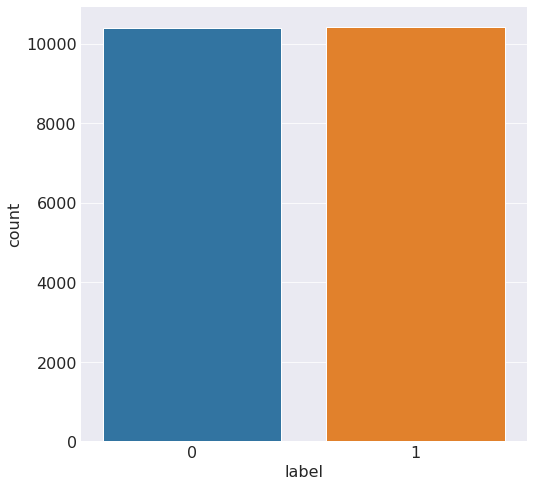

In [7]:
# plot the number of samples per class
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(x="label", data=train)

In [8]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [10]:
train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

## Check number of NULL values in the dataset

In [11]:
# how many null values in the dataset
print("Null values in train data:")
print(train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


<AxesSubplot:>

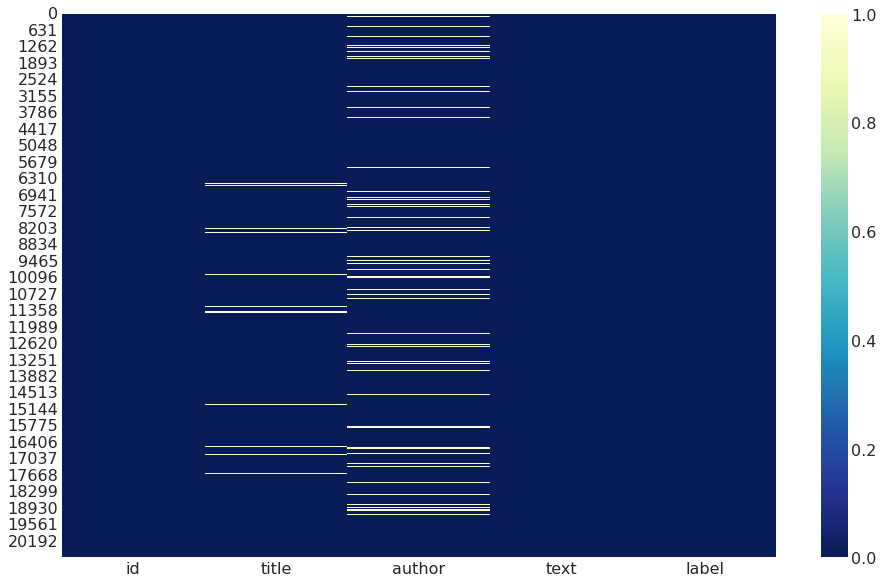

In [12]:
sns.heatmap(train.isnull(),cmap='YlGnBu_r')

In [13]:
print(train.dtypes)

id         int64
title     object
author    object
text      object
label      int64
dtype: object


## Missing data imputation

In [14]:
#imputing the data
test=test.fillna(' ') 
train=train.fillna(' ') 

<AxesSubplot:>

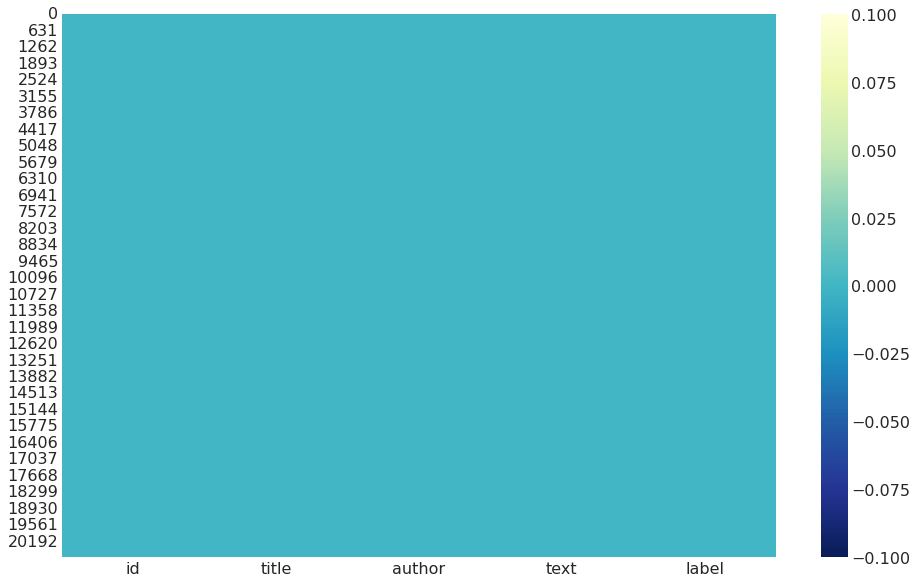

In [15]:
sns.heatmap(train.isnull(), cmap='YlGnBu_r')

the 920586
to 426276
of 418156
and 383023
in 311144
that 217827
is 156845
for 144756
on 130799
it 125228
with 102572
he 102434
was 101727
as 99072
said 80054
by 78684
are 73717
at 73574
have 72417
be 71739


<AxesSubplot:title={'center':'Top 20 words in dataset before removing stop words'}, xlabel='text'>

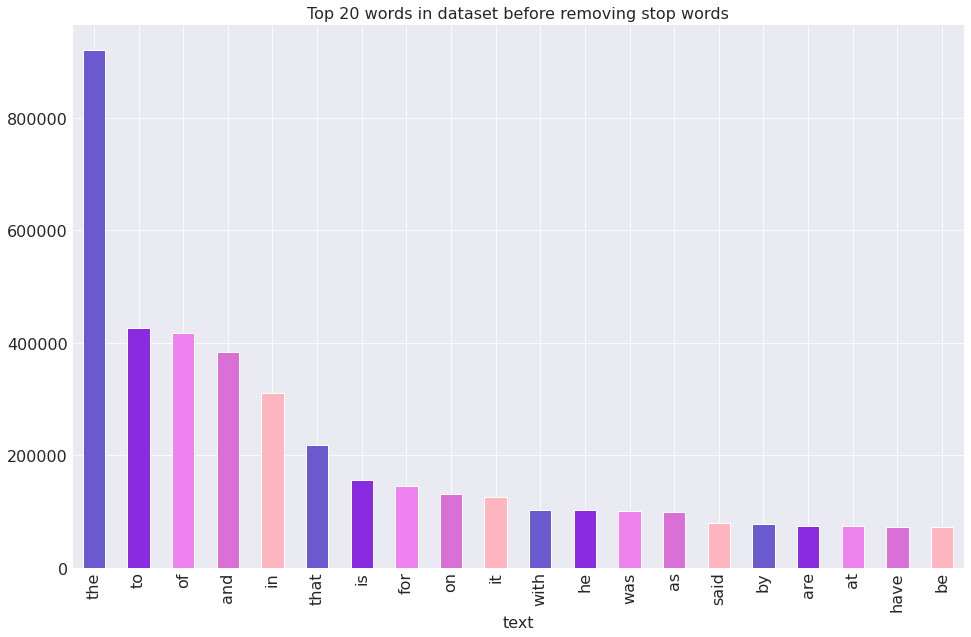

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset before removing stop words',color=['slateblue', 'blueviolet', 'violet', 'orchid', 'lightpink'])

the 920586
to 426276
of 418156
and 383023
in 311144
that 217827
is 156845
for 144756
on 130799
it 125228
with 102572
he 102434
was 101727
as 99072
said 80054
by 78684
are 73717
at 73574
have 72417
be 71739


<AxesSubplot:title={'center':'Top 20 words in dataset before removing stop words'}, xlabel='text'>

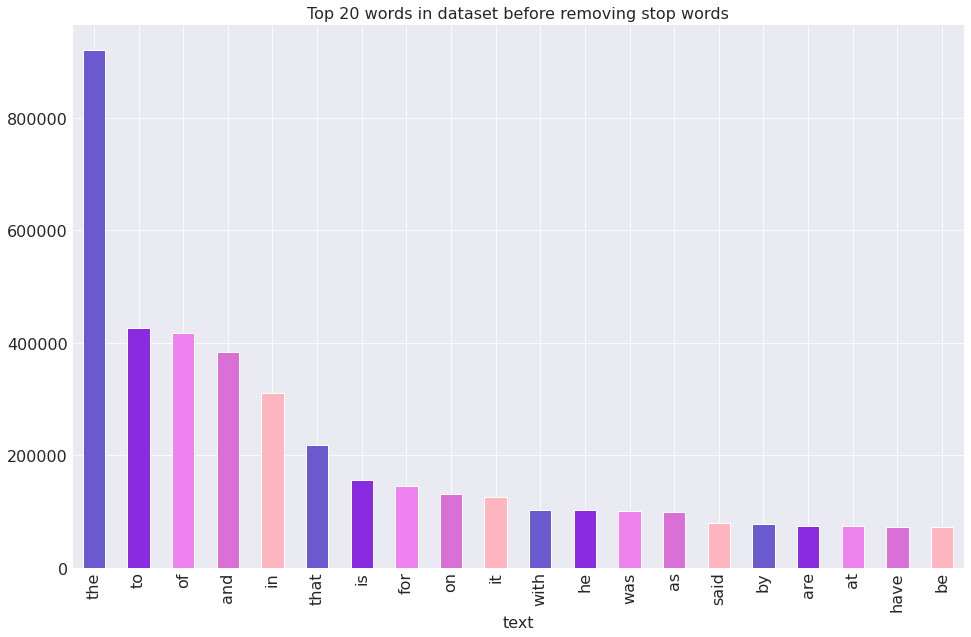

In [17]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset before removing stop words',color=['slateblue', 'blueviolet', 'violet', 'orchid', 'lightpink'])

<AxesSubplot:title={'center':'Number of True vs Fake News'}, ylabel='Frequency'>

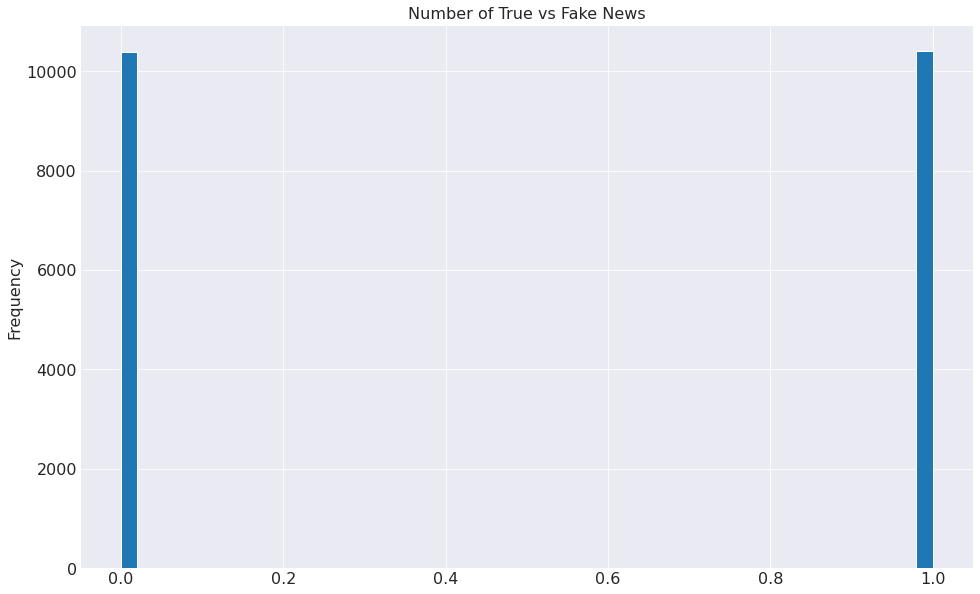

In [18]:
train['label'].plot(
    kind='hist',
    bins=50,
    title='Number of True vs Fake News')

## Merging the columns (title, author, text) into one column

In [19]:
test['content']=test['title']+' '+test['author']+test['text']
train['content']=train['title']+' '+train['author']+train['text']

In [20]:
train.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


## Cleaning and Preprocessing

## Regex

In [21]:
#Remove punctuations from the String  
sample = "!</> NLP is $$ </>^sh!!!o%%rt &&%$fo@@@r^^^&&!& </>*Natural@# Language&&\ Pro@@@##%^^&cessing!@# %%$"

# what is gonna get selected we r gonna replace that with the empty string(2nd parameter)
sample = re.sub(r'[^\w\s]','',sample)

print(sample)

 NLP is  short for Natural Language Processing 


## Tokenization

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
print("The NLTK tokeniser has tokenised \"Computers are not as great at understanding words as they are numbers.\" into a list of tokens ", end="\n\n")
print(nltk.word_tokenize("Computers are not as great at understanding words as they are numbers."))

The NLTK tokeniser has tokenised "Computers are not as great at understanding words as they are numbers." into a list of tokens 

['Computers', 'are', 'not', 'as', 'great', 'at', 'understanding', 'words', 'as', 'they', 'are', 'numbers', '.']


## Removing StopWords

In [24]:
sample_text = "Does this thing really work? Lets see." 

In [25]:
words = nltk.word_tokenize(sample_text)

In [26]:
from nltk.corpus import stopwords
# corpus of nltk will hold the stopwords

stop=stopwords.words("english")
print(stop)

clean_words = [w for w in words if not w in stop]
#this is basically saying go through each word and add it into this new array only if it's not a part of the stopwords

for i in clean_words:
    print(i)
    

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
import string
punctuations = list(string.punctuation)

print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [28]:
stop = stop + punctuations

In [29]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
clean_words = [w for w in words if not w in stop]
clean_words
#clean_words includes all the words in the sentence excluding the stopwords

['Does', 'thing', 'really', 'work', 'Lets', 'see']

## Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer
#Using WordNet lemmatizer
lemmatizer=WordNetLemmatizer()

input_str="Kites Babies Meeting Is Done Languages Cities Mice"

In [32]:
from nltk.tokenize import sent_tokenize, word_tokenize 
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

In [33]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [34]:
# import these modules 
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() #need to tokenise the complee sentence


print("Below, see how kites->kite, babies->baby, languages -> language, cities -> city, mice -> mouse. Stemming couldn't have done this", end="\n\n")
#now each token i ll pass to he lemmatizer to see its reduced form
#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word).lower())

Below, see how kites->kite, babies->baby, languages -> language, cities -> city, mice -> mouse. Stemming couldn't have done this

kites
babies
meeting
is
done
languages
cities
mice


## Pre-Processing

In [35]:
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows(): #taking he train data and iterating each row
    filter_sentence = ''
    
    sentence = row['content']
    sentence = re.sub(r'[^\w\s]','',sentence) 
    
    words = nltk.word_tokenize(sentence) #tokenizing the sentence
    
    words = [w for w in words if not w in stop]  #removing the stopwords
    
    #after removing the stopwords, applying the WornNet Lemmatizer
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    # at the end, again putting the filter_sentence back into the training document at the same position    
    train.loc[index,'content'] = filter_sentence

said 80090
mr 66291
trump 47614
new 37077
people 36690
year 31742
like 26786
president 25134
time 24955
state 24849
clinton 23484
government 17869
day 17650
country 17583
say 16922
world 16241
american 15774
make 15376
news 15226
election 15121


<AxesSubplot:title={'center':'Top 20 words in dataset after text-preprocessing'}, xlabel='content'>

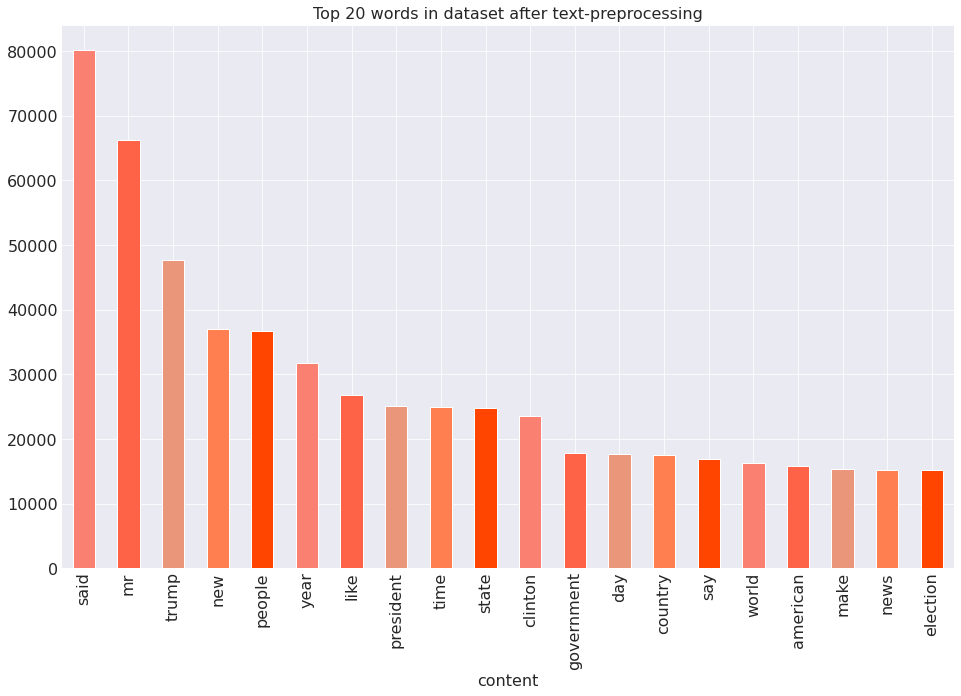

In [36]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train['content'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['content' , 'count'])
df2.groupby('content').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset after text-preprocessing',color=['salmon', 'tomato', 'darksalmon', 'coral', 'orangered'])

new york 14704
mr trump 12360
united states 12356
york times 8943
donald trump 8533
hillary clinton 7338
white house 6128
mr trumps 4983
mrs clinton 3359
said mr 2696
year ago 2661
islamic state 2228
obama administration 2129
national security 2059
secretary state 1974
mr obama 1912
trump said 1869
president trump 1867
law enforcement 1865
social medium 1864


<AxesSubplot:title={'center':'Top 20 bi-grams in dataset after text-preprocessing'}, xlabel='content'>

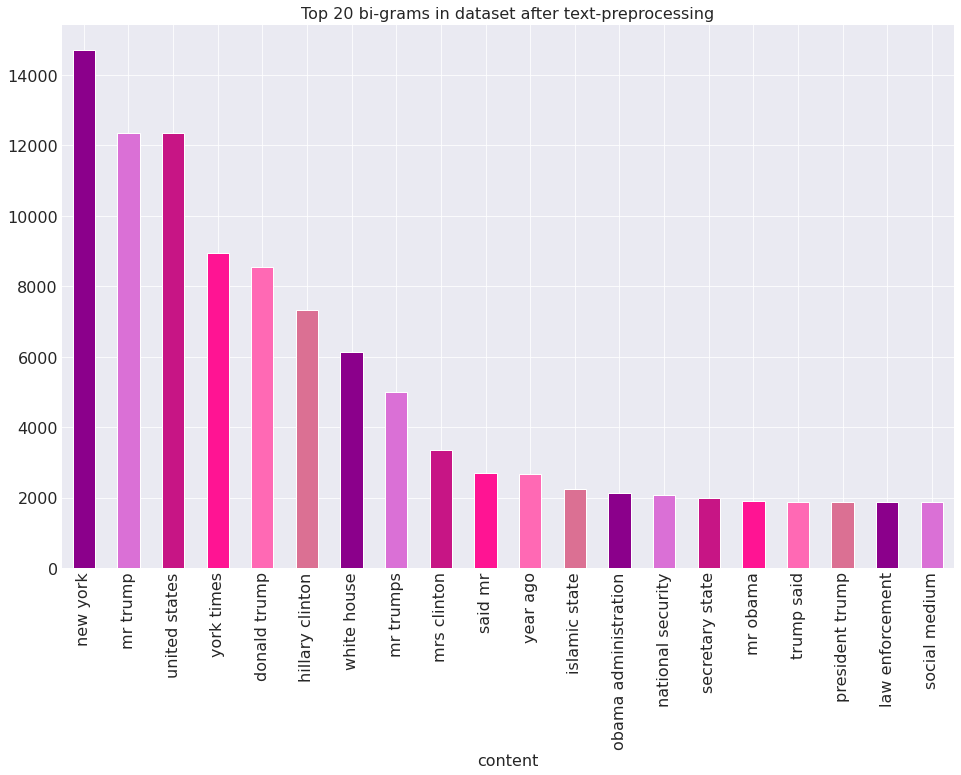

In [37]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(train['content'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['content' , 'count'])
df4.groupby('content').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bi-grams in dataset after text-preprocessing', color=['darkmagenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'palevioletred'])

In [38]:
def plot_word_number_histogram(textno, textye):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Reliable')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Unreliable')
    
    fig.suptitle('Fake News', fontsize=24, va='baseline')
    
    fig.tight_layout()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


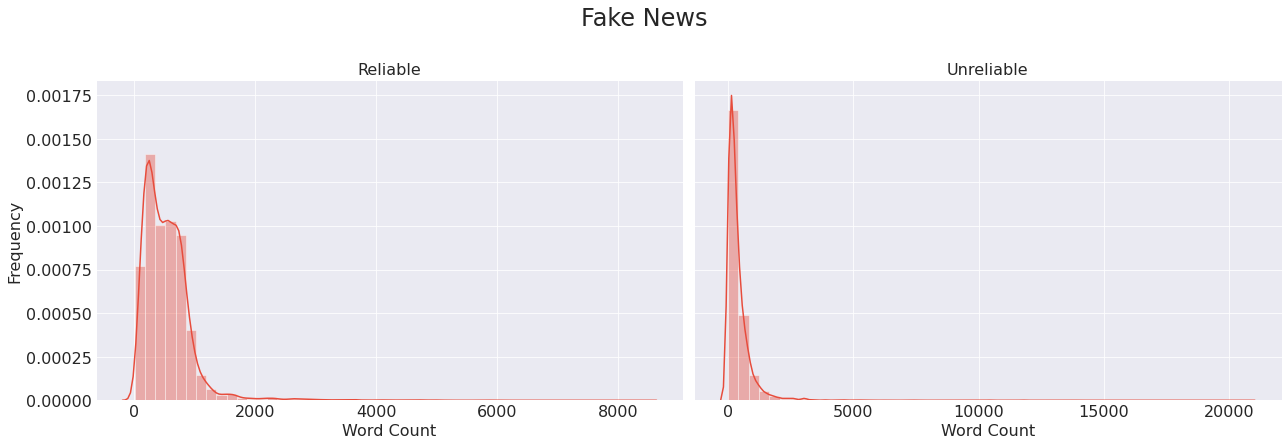

In [39]:
plot_word_number_histogram(train[train['label'] == 0]['content'],
                           train[train['label'] == 1]['content'])

In [40]:
def plot_word_len_histogram(textno, textye):
    
    """A function for comparing average word length"""
    
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Reliable')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Unreliable')
    
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


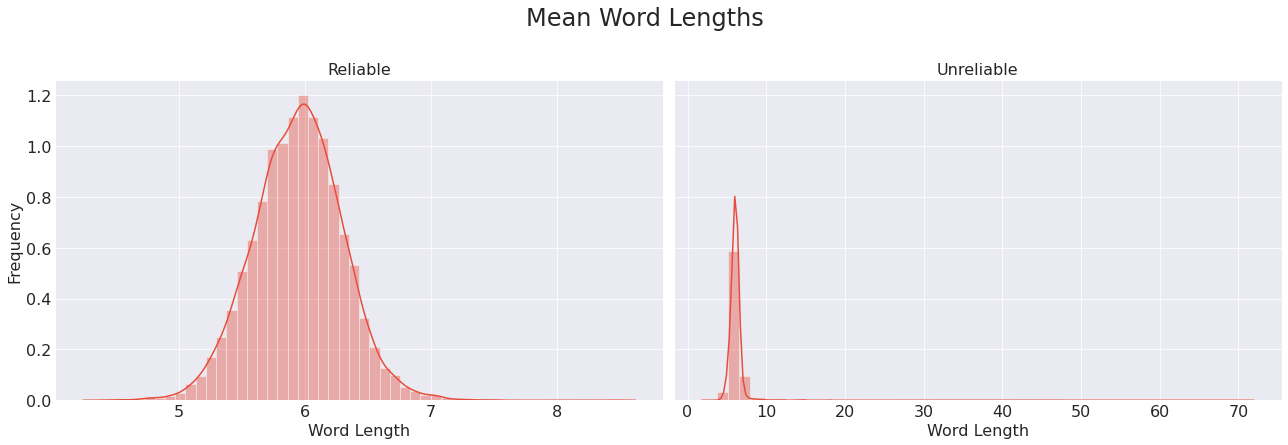

In [41]:
plot_word_len_histogram(train[train['label'] == 0]['content'],
                        train[train['label'] == 1]['content'])

In [42]:
lis_text = [

    train[train['label'] == 0]['content'],
    train[train['label'] == 1]['content']
]

lis_title = [
    train[train['label'] == 0]['content'],
    train[train['label'] == 1]['content']
]

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_text, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1
     #   print(dic)
        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        #   print(top)
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

No stopwords left in texts.


['trump', 'people', 'clinton', 'one', 'us', 'would', 'hillary', 'said', 'state', 'new', 'time', 'like', 'year', 'also', 'election', 'world', 'even', 'government', 'war', 'president', 'many', '2016', 'country', 'could'] [18004, 16748, 16682, 16379, 14830, 14506, 12264, 11875, 10844, 10749, 10556, 10378, 10363, 9912, 9752, 9356, 8823, 8646, 8509, 8032, 7955, 7924, 7579, 7514]


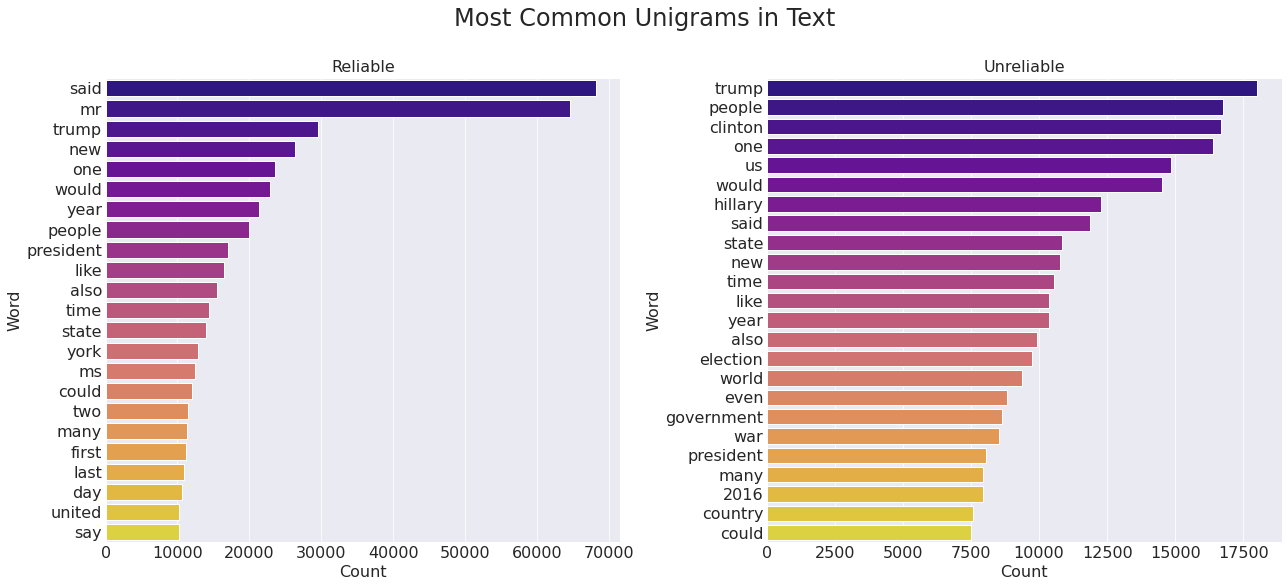

In [44]:
# Displaying most common words.
from collections import Counter, defaultdict

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_text, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)


    sns.barplot(x=y, y=x, palette='plasma', ax=j)
print(x, y)
axes[0].set_title('Reliable')
axes[1].set_title('Unreliable')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams in Text', fontsize=24, va='baseline')
plt.tight_layout()

['trump', 'people', 'clinton', 'one', 'us', 'would', 'hillary', 'said', 'state', 'new', 'time', 'like', 'year', 'also', 'election', 'world', 'even', 'government', 'war', 'president', 'many', '2016', 'country', 'could'] [18004, 16748, 16682, 16379, 14830, 14506, 12264, 11875, 10844, 10749, 10556, 10378, 10363, 9912, 9752, 9356, 8823, 8646, 8509, 8032, 7955, 7924, 7579, 7514]


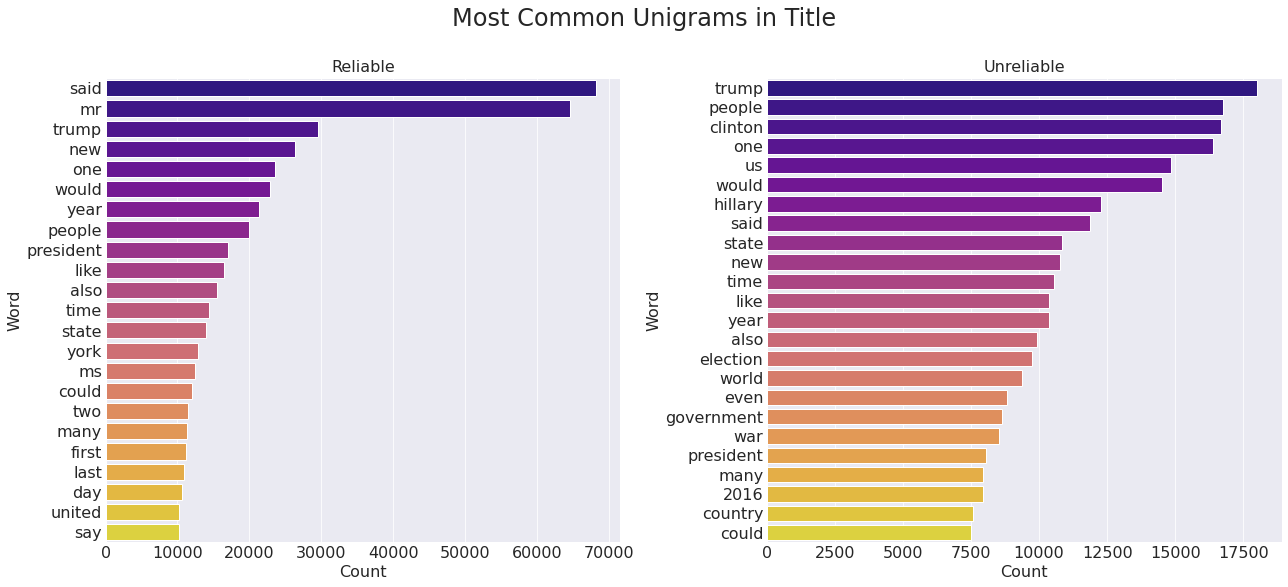

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_title, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)


    sns.barplot(x=y, y=x, palette='plasma', ax=j)
print(x, y)
axes[0].set_title('Reliable')
axes[1].set_title('Unreliable')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams in Title', fontsize=24, va='baseline')
plt.tight_layout()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
def ngrams(n, title, lis_type):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis_type, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        
        axes[0].set_title('Reliable')
        axes[1].set_title('Unreliable')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

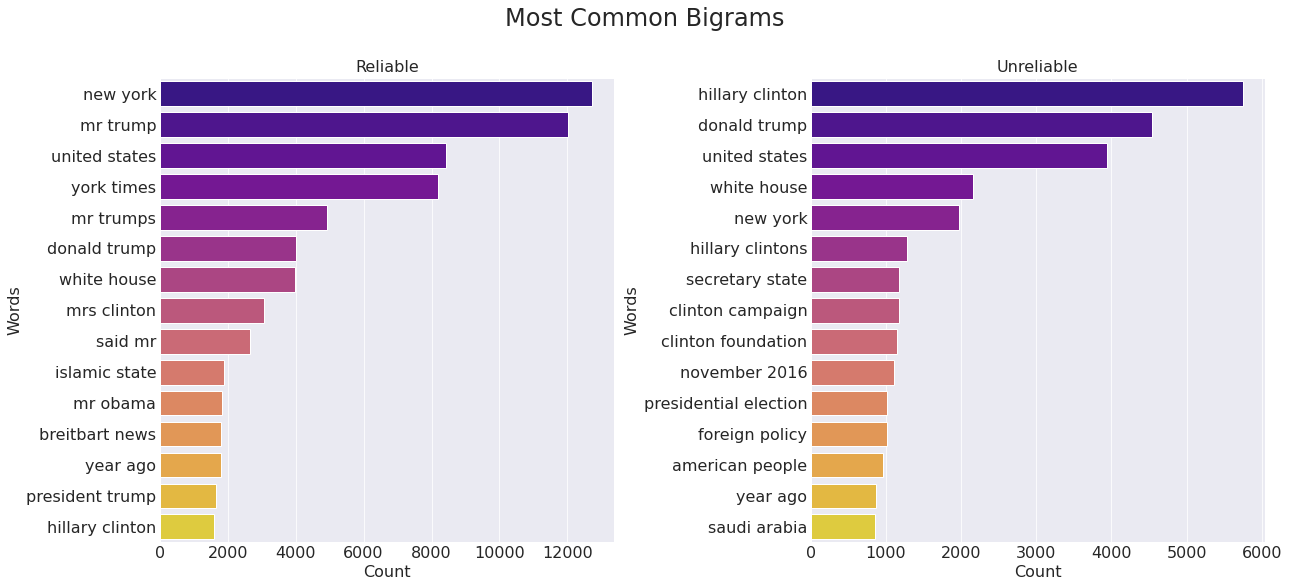

In [47]:
ngrams(2, 'Most Common Bigrams', lis_title)

In [48]:
# Obtain the total words present in the dataset
list_of_words = []
for i in train.content:
    for j in i:
        list_of_words.append(j)

In [49]:
len(list_of_words)

68332444

In [50]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

742

In [51]:
# dataframe information
train.info()
# check for null values
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       20800 non-null  int64 
 1   title    20800 non-null  object
 2   author   20800 non-null  object
 3   text     20800 non-null  object
 4   label    20800 non-null  int64 
 5   content  20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


id         0
title      0
author     0
text       0
label      0
content    0
dtype: int64

## Scrap all columns except Content and Label

In [52]:
train = train[['content','label']]

In [53]:
train.head()
#column 'total' has the preprocessed text

,content,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
train_set = {"the sky is blue", "the sun is bright"}
count_vec = CountVectorizer(max_features = 3)
a = count_vec.fit_transform(train_set)
a.todense()

matrix([[1, 1, 1],
        [0, 1, 1]])

In [55]:
count_vec.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['blue', 'is', 'the']

## Applying NLP Techniques

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
X_train = train['content']
Y_train = train['label']

## Bag-of-words / CountVectorizer

In [58]:
# the corpus holds some sentences
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# in sklearn, we can import Bag of Words model through CountVectorizer. This works pretty much like Bag of words
# it is modified version of Bag of Words. It replaces the vector, instead of 1, w the frequency...

# we r making the object, vectorizer, of class/module CountVectorizer()
vectorizer = CountVectorizer()

In [59]:
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print("The above words are the unique words and consists of the feature set")

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
The above words are the unique words and consists of the feature set


In [60]:
print("The below matrix will show the frequency of the features in the feature set", end="\n\n")
X.todense()

The below matrix will show the frequency of the features in the feature set



matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]])

## TF-iDF Vectorizer

In [61]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english', #it will remove the englsh stopwords
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2), #single_words or 2words(bi-grams)
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [62]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30) 
# 30 here is the number of max_features

In [63]:
print("creates some weight for all these words: ", end='\n\n')
tfidf_features

creates some weight for all these words: 



array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

## Applying Feature Extraction using count vectorization and tfidf

In [64]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [65]:
print("10 feature names are:", end = '\n\n')
count_vectorizer.get_feature_names()[9000:9010]

10 feature names are:



['acrefeet',
 'acres',
 'acrespopulation',
 'acresworth',
 'acrid',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'acrisolada',
 'acrobat']

In [66]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

In [67]:
tf_idf_matrix.toarray().shape

(20800, 220387)

## Modelling

In [68]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [69]:
print(X_train.shape, y_train.shape)

(15600, 220387) (15600,)


In [70]:
print(X_test.shape, y_test.shape)

(5200, 220387) (5200,)


## Passive Aggressive Classifier

In [71]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=10000, random_state=1,tol=1e-3).fit(X_train, y_train)

In [72]:
y_pred_pa = model.predict(X_test)
print(model.score(X_test, y_test))

0.9771153846153846


In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred_pa))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2564
           1       0.97      0.98      0.98      2636

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



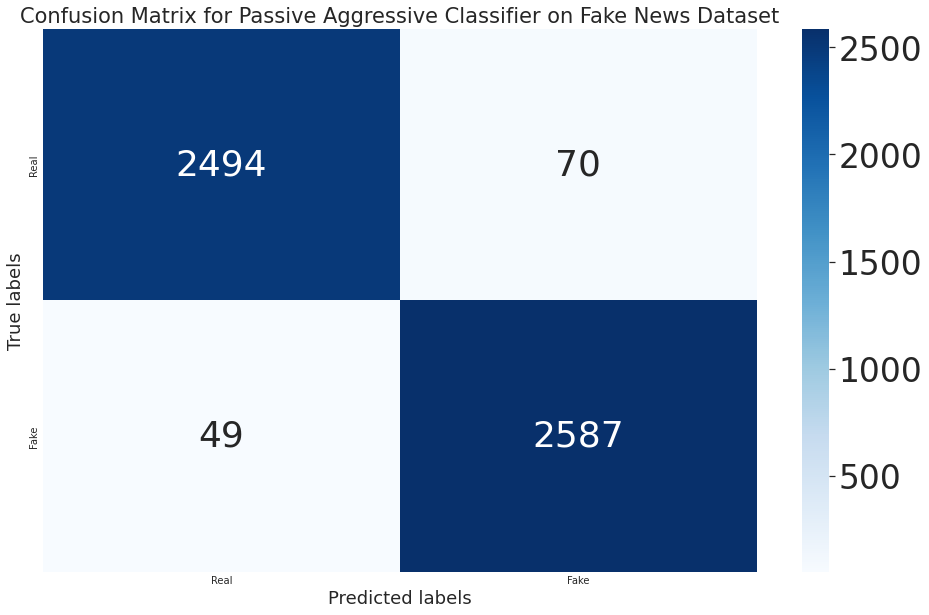

<Figure size 1152x720 with 0 Axes>

In [74]:
cm = confusion_matrix(y_test, y_pred_pa)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Confusion Matrix for Passive Aggressive Classifier on Fake News Dataset', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Real', 'Fake']);
ax.yaxis.set_ticklabels(['Real', 'Fake']);
plt.show()
plt.savefig('PassiveAgressive.png')